In [1]:
import numpy as np, curvedsky as cs, sys, plottools as pl, local, tools_cmbalm, tqdm
from matplotlib.pyplot import *

/global/homes/t/toshiyan/Work/Lib/actlib/actsims/actsims/noise.py:9: UserWarning: No pyfftw found. Using much slower numpy fft engine.
  if 'fftw' not in pfft.engine: warnings.warn("No pyfftw found. Using much slower numpy fft engine.")


In [2]:
def aps_read(qids,Tcmb=2.72e6,**kwargs):
    aobj, mcl, ncl = {}, {}, {}
    for q in qids:
        aobj[q] = local.init_analysis_params(qid=q,**kwargs)
        mcl[q] = np.loadtxt(aobj[q].fscl['c'],unpack=True)[1] / Tcmb**2
        ncl[q] = np.loadtxt(aobj[q].fscl['n'],unpack=True)[1] / Tcmb**2
    return aobj, mcl, ncl

In [3]:
def SNR(L,ckk,nkk,Lmin=100,fsky=1600./41000.):
    snr = np.sqrt( fsky * np.sum( (L[Lmin:]+.5)*ckk[Lmin:]**2/(ckk+nkk)[Lmin:]**2 ) )
    print(snr)
    return snr

In [4]:
def comb_Nl(qids,mcl,ncl,cTT):
    Nl = 0.
    for q in qids:
        flT = (mcl[q]-ncl[q])/cTT
        Nl += flT/ncl[q]
    Nl = 1./Nl
    return Nl

In [5]:
kwargs = {'snmin':0,'snmax':10}
qids_d = ['boss_d01','boss_d02','boss_d03','boss_d04','s16_d01','s16_d02','s16_d03']
qids_n = ['boss_01','boss_02','boss_03','boss_04']
qids_t = qids_d + qids_n

In [6]:
aobj, mcl, ncl = aps_read(qids_t,**kwargs)
cTT = aobj[qids_t[0]].lcl[0,:]

In [7]:
Ncl_d = comb_Nl(qids_d,mcl,ncl,cTT)
Ncl_n = comb_Nl(qids_n,mcl,ncl,cTT)
Ncl_t = 1./(1./Ncl_d+1./Ncl_n)

/global/homes/t/toshiyan/.conda/envs/loc/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.
/global/homes/t/toshiyan/.conda/envs/loc/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.
/global/homes/t/toshiyan/.conda/envs/loc/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


In [8]:
Lmax = 2048
L = np.linspace(0,Lmax,Lmax+1)
ckk = aobj[qids_t[0]].ckk[:Lmax+1]

In [12]:
rlmin, rlmax = 500, 3000
Ag = {}
for q in tqdm.tqdm(qids_t):
    Ag[q] = cs.norm_tau.qtt(Lmax,rlmin,rlmax,cTT[:rlmax+1],(cTT+ncl[q])[:rlmax+1])
Ag_d = cs.norm_tau.qtt(Lmax,rlmin,rlmax,cTT[:rlmax+1],(cTT+Ncl_d)[:rlmax+1])
Ag_n = cs.norm_tau.qtt(Lmax,rlmin,rlmax,cTT[:rlmax+1],(cTT+Ncl_n)[:rlmax+1])
Ag_t = cs.norm_tau.qtt(Lmax,rlmin,rlmax,cTT[:rlmax+1],(cTT+Ncl_t)[:rlmax+1])
#SNR(L,ckk,Ag_d)
#SNR(L,ckk,Ag_n)
#SNR(L,ckk,Ag_t)

100%|██████████| 11/11 [00:25<00:00,  2.29s/it]


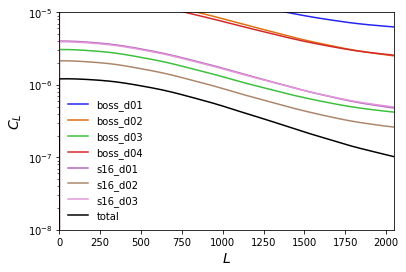

In [14]:
pl.plot_1dstyle(ylog=True,xmin=1,xmax=Lmax,ymin=1e-8,ymax=1e-5)
for q in qids_d:
    plot(L,Ag[q],label=q)
plot(L,Ag_d,'-',label='total',color='k')
legend()

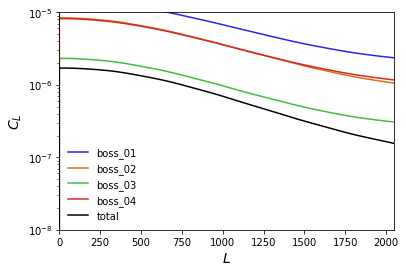

In [15]:
pl.plot_1dstyle(ylog=True,xmin=1,xmax=Lmax,ymin=1e-8,ymax=1e-5)
for q in qids_n:
    plot(L,Ag[q],label=q)
plot(L,Ag_n,'-',label='total',color='k')
legend()

In [23]:
l, Nplk = np.loadtxt('/global/homes/t/toshiyan/Work/Lib/cmblensplus/example/data/Al_TT_dr2_smica_Lmask_a0.0deg_cinv_l100-2048.dat',unpack=True,usecols=(0,1))

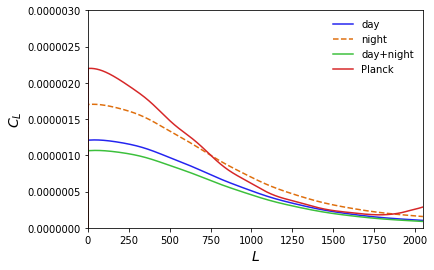

In [27]:
pl.plot_1dstyle(ylog=False,xmin=1,xmax=Lmax,ymin=0.,ymax=3e-6)
plot(L,Ag_d,'-',label='day')
plot(L,Ag_n,'--',label='night')
plot(L,Ag_t,'-',label='day+night')
plot(l,Nplk,label='Planck')
legend()